In [1]:
# Dependencies
import os
import pathlib
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from uszipcode import SearchEngine

/Users/natalia/anaconda3/envs/intro_python_requirements_osx/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Study data files
last_path = "./data/merged_df_cleaned1806.csv"

In [3]:
# Read the brewery data and the study results
last_df = pd.read_csv(last_path, index_col="City")

In [4]:
# Display dataframe
last_df.head()

,name,brewery_type,address_1,State,postal_code,longitude,latitude,state_x,zip_code,brewery_id,...,income_household_median,income_family_median,income_nonfamily_median,earnings_median,employment_total,employment_male,employment_female,occupancy_status_total,occupancy_status_occupied,occupancy_status_vacant
City,,,,,,,,,,,,,,,,,,,,,
Norman,(405) Brewing Co,micro,1716 Topeka St,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069.0,1,...,71963.0,59063.0,28261.0,31076.0,18444.0,44975.0,46495.0,57307.0,53446.0,3861.0
San Diego,10 Barrel Brewing Co,large,1501 E St,California,92101-6618,-117.129593,32.714813,California,92101.0,3,...,93042.0,107093.0,74377.0,48579.0,1150367.0,502249.0,457320.0,555456.0,521000.0,34456.0
Bend,10 Barrel Brewing Co,large,62970 18th St,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701.0,4,...,55398.0,86510.0,37802.0,49717.0,32362.0,32384.0,30907.0,47882.0,44620.0,3262.0
Bend,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703.0,5,...,55398.0,86510.0,37802.0,49717.0,32362.0,32384.0,30907.0,47882.0,44620.0,3262.0
Portland,10 Barrel Brewing Co,large,1411 NW Flanders St,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209.0,6,...,36125.0,79590.0,40542.0,46590.0,50737.0,229443.0,227784.0,303483.0,286734.0,16749.0


In [8]:
last_df.columns

Index(['name', 'brewery_type', 'address_1', 'State', 'postal_code',
       'longitude', 'latitude', 'state_x', 'zip_code', 'brewery_id', 'NAME',
       'state_y', 'place', 'population_total', 'population_male',
       'population_female', 'population_median_age',
       'population_median_age_male', 'population_median_age_female',
       'population_total_2', 'population_18_to_24', 'population_25_to_34',
       'population_35_to_44', 'population_45_to_54', 'population_55_to_64',
       'income_household', 'income_household_median', 'income_family_median',
       'income_nonfamily_median', 'earnings_median', 'employment_total',
       'employment_male', 'employment_female', 'occupancy_status_total',
       'occupancy_status_occupied', 'occupancy_status_vacant'],
      dtype='object')

In [18]:
# Plot brewery type per state
Summary_df = last_df.groupby('State')[['population_total','population_male',  'population_female', 'population_median_age',
       'population_median_age_male', 'population_median_age_female', 'population_total_2','population_18_to_24','population_25_to_34','population_35_to_44','population_45_to_54','population_55_to_64','income_household', 'income_household_median','income_family_median','income_nonfamily_median','earnings_median','employment_total','employment_male' , 'employment_female','occupancy_status_total', 'occupancy_status_occupied', 'occupancy_status_vacant']].mean()
Summary_df

,population_total,population_male,population_female,population_median_age,population_median_age_male,population_median_age_female,population_total_2,population_18_to_24,population_25_to_34,population_35_to_44,...,income_household_median,income_family_median,income_nonfamily_median,earnings_median,employment_total,employment_male,employment_female,occupancy_status_total,occupancy_status_occupied,occupancy_status_vacant
State,,,,,,,,,,,,,,,,,,,,,
Alabama,1.354198e+05,6.566439e+04,6.975539e+04,37.355263,35.334211,39.007895,135419.789474,15561.631579,20733.763158,17560.210526,...,56452.236842,72843.184211,3.918626e+04,37058.578947,110321.342105,4.302618e+04,4.504195e+04,6.738192e+04,5.840645e+04,8975.473684
Alaska,2.113497e+05,1.081875e+05,1.031622e+05,35.580000,34.510000,36.120000,211349.700000,20294.900000,34768.000000,31230.300000,...,82591.500000,103638.500000,4.803240e+04,41853.800000,165856.200000,7.170450e+04,6.715160e+04,8.815370e+04,8.055660e+04,7597.100000
Arizona,4.956868e+05,2.485697e+05,2.471171e+05,37.696262,37.060748,38.342991,446381.672897,45879.093458,70466.794393,59939.579439,...,71187.943925,87112.766355,4.713595e+04,40389.383178,396322.878505,1.666152e+05,1.618841e+05,2.079479e+05,1.922823e+05,15665.570093
Arkansas,1.114171e+05,5.315462e+04,5.826244e+04,34.664706,33.982353,35.017647,41567.705882,5237.205882,5703.352941,5011.911765,...,59020.205882,73462.411765,3.068438e+04,36750.264706,87850.117647,3.510415e+04,3.720391e+04,5.276965e+04,4.713650e+04,5633.147059
California,5.236191e+05,2.638434e+05,2.597757e+05,37.509241,36.566621,38.566345,71981.586207,6548.404138,10584.028966,10010.820690,...,93356.617931,110188.357241,-8.623454e+05,48253.955862,433147.233103,1.838463e+05,1.748875e+05,2.100992e+05,1.940117e+05,16087.492414
Colorado,3.213297e+05,1.615129e+05,1.598168e+05,35.859935,35.297394,36.448534,49637.006515,4968.449511,7434.605863,7221.687296,...,82940.013029,109274.263844,4.750764e+04,44702.188925,266444.592834,1.153266e+05,1.096616e+05,1.511754e+05,1.416334e+05,9541.996743
Connecticut,9.512182e+04,4.648900e+04,4.863282e+04,36.254545,34.786364,37.886364,53694.318182,5838.772727,7669.863636,6765.363636,...,61391.909091,76848.545455,4.872050e+04,36002.863636,77687.045455,3.199077e+04,3.223141e+04,4.183245e+04,3.773627e+04,4096.181818
Delaware,4.713892e+04,2.323592e+04,2.390300e+04,35.183333,32.908333,36.250000,309976.250000,31288.333333,65430.666667,50143.166667,...,57607.750000,97688.916667,5.430917e+04,33580.916667,40072.333333,1.664742e+04,1.554858e+04,2.230117e+04,1.957100e+04,2730.166667
District of Columbia,6.700500e+05,3.190250e+05,3.510250e+05,34.800000,34.700000,35.000000,95779.000000,13294.000000,15015.000000,9033.000000,...,90088.000000,136184.000000,4.628800e+04,72457.000000,553437.000000,2.241980e+05,2.436240e+05,3.574820e+05,3.195650e+05,37917.000000


Text(0, 0.5, 'Population')

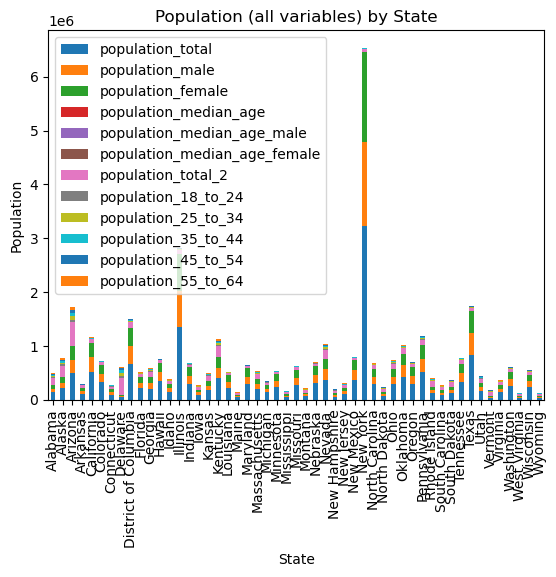

In [31]:
Summary_df.plot(kind='bar', y=['population_total', 'population_male',
       'population_female', 'population_median_age',
       'population_median_age_male', 'population_median_age_female',
       'population_total_2', 'population_18_to_24', 'population_25_to_34',
       'population_35_to_44', 'population_45_to_54', 'population_55_to_64',], stacked=True)
plt.title('Population (all variables) by State')
plt.xlabel('State')
plt.ylabel('Population')

Text(0, 0.5, 'Population')

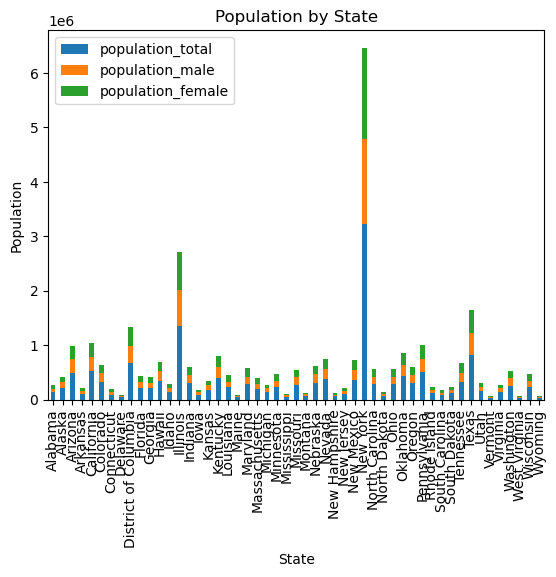

In [30]:
Summary_df.plot(kind='bar', y=['population_total', 'population_male',
       'population_female'], stacked=True)
plt.title('Population by State')
plt.xlabel('State')
plt.ylabel('Population')

Text(0, 0.5, 'Population')

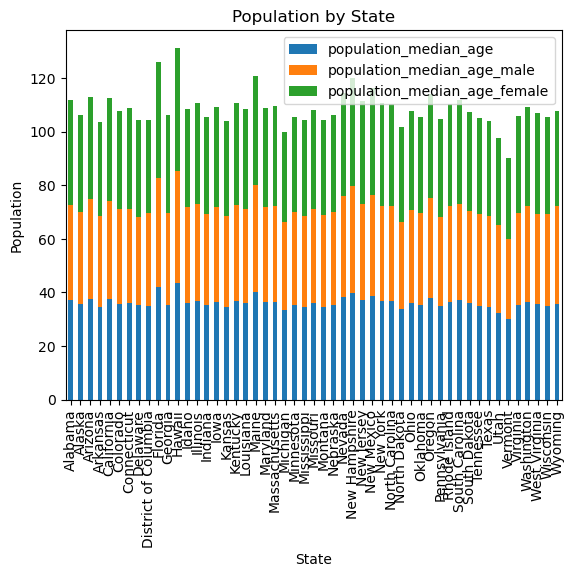

In [21]:
Summary_df.plot(kind='bar', y=['population_median_age',
       'population_median_age_male', 'population_median_age_female'], stacked=True)
plt.title('Population by State')
plt.xlabel('State')
plt.ylabel('Population')


Text(0, 0.5, 'Population')

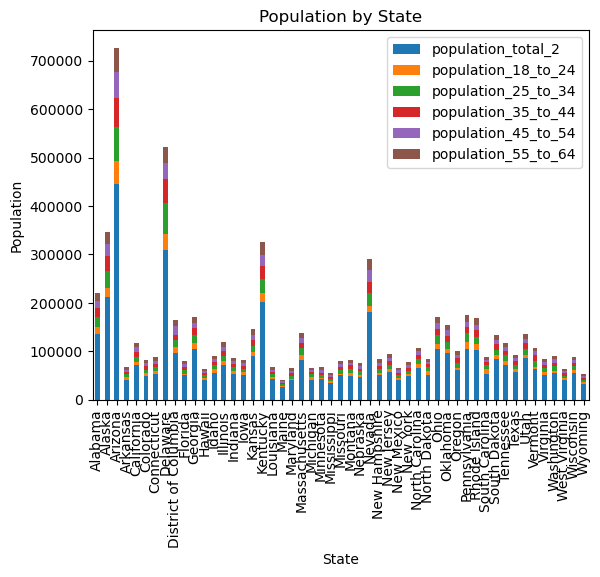

In [22]:
Summary_df.plot(kind='bar', y=['population_total_2', 'population_18_to_24', 'population_25_to_34',
       'population_35_to_44', 'population_45_to_54', 'population_55_to_64'], stacked=True)
plt.title('Population by State')
plt.xlabel('State')
plt.ylabel('Population')

Text(0, 0.5, 'Income Household')

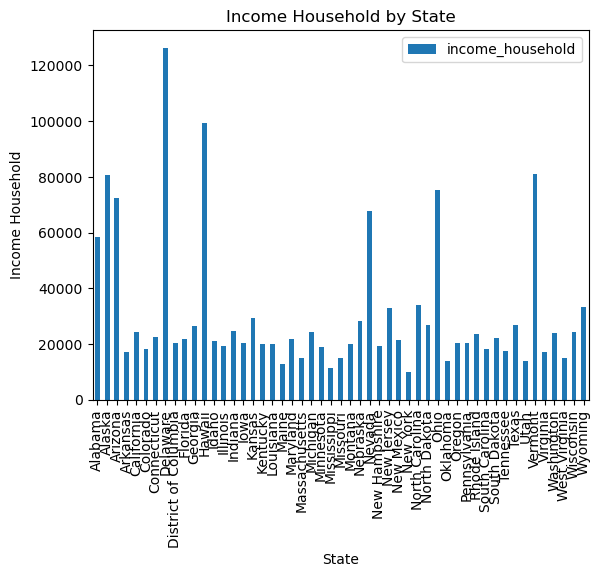

In [28]:
Summary_df.plot(kind='bar', y=['income_household'], stacked=True)
plt.title('Income Household by State')
plt.xlabel('State')
plt.ylabel('Income Household')



Text(0, 0.5, 'Income Houshold')

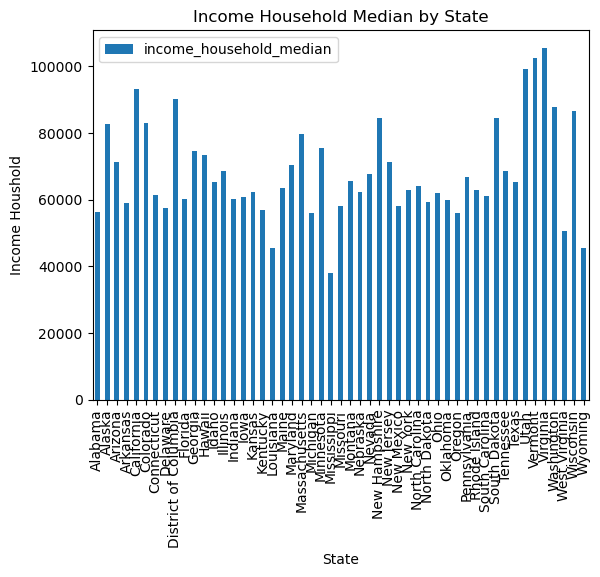

In [27]:
Summary_df.plot(kind='bar', y=['income_household_median'], stacked=True)
plt.title('Income Household Median by State')
plt.xlabel('State')
plt.ylabel('Income Houshold')

Text(0, 0.5, 'Employment')

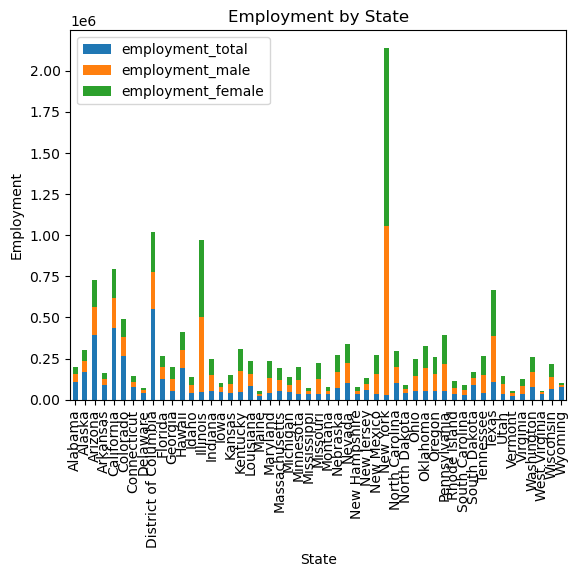

In [26]:
Summary_df.plot(kind='bar', y=['employment_total',
       'employment_male', 'employment_female'], stacked=True)
plt.title('Employment by State')
plt.xlabel('State')
plt.ylabel('Employment')

Text(0, 0.5, 'Occupancy')

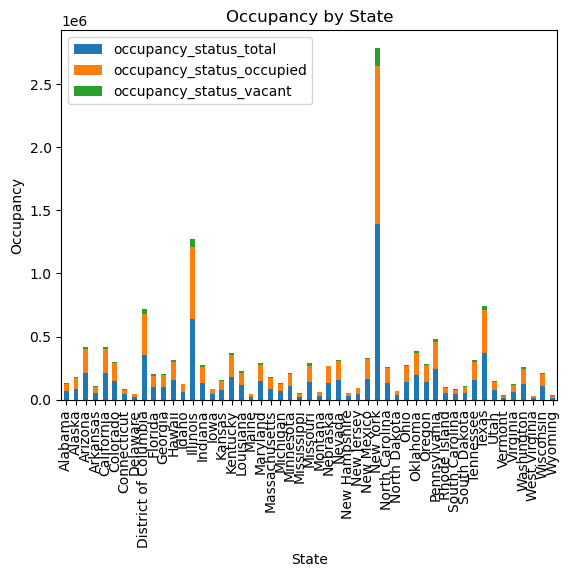

In [32]:
Summary_df.plot(kind='bar', y=['occupancy_status_total',
       'occupancy_status_occupied', 'occupancy_status_vacant'], stacked=True)
plt.title('Occupancy by State')
plt.xlabel('State')
plt.ylabel('Occupancy')